<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase32_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales

La librería que utilizaremos para definir nuestras redes neuronales es tensorflow 2.7.0: https://www.tensorflow.org/?hl=es-419



In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tensorflow.__version__

'2.15.0'

Los pasos básicos a seguir con tensorflow son:

1. Definimos un modelo: indicamos cantidad y tipos de neuronas.
2. Compilamos el modelo: indicamos función de costo y optimizador.
3. Entrenamos el modelo: cantidad de iteraciones (epochs) y otros parámetros.

Vamos a comenzar trabajando con un dataset sintético simplemente para conocer como trabaja tensorflow.

La siguiente celda simplemente arma el dataset sintético.

In [3]:
from sklearn.datasets import make_blobs, make_moons
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
X, y = make_moons(n_samples=1000, random_state=0)

In [4]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


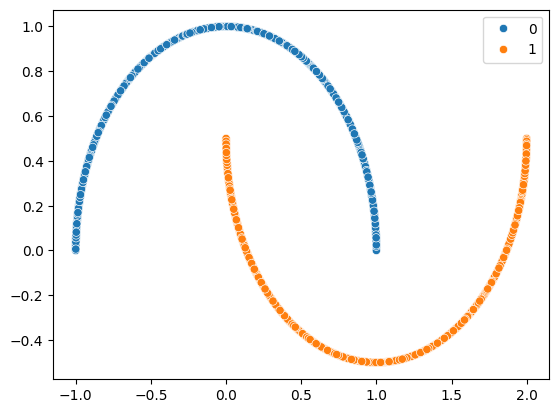

In [5]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Unas de las maneras de definir una red neuronal en tensorflow keras es Sequential.

En sequential, lo que hacemos es definir el modelo de la siguiente manera:

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Lo primero que hicimos fué definir el modelo sequential.

Una vez definido, le vamos agregando capas. En este caso, primero agregamos una capa de 10 neuronas (Dense) con función de activación relu.

Luego, una capa con 1 sola neurona y la función de activación sigmoid.

Tenemos 1 sola capa de salida con sigmoid y esto significa que nuestra salida sera un valor entre 0 y 1.

Ahora debemos definir un optimizador y compilar nuestro modelo:

Uno de los optimizadores más utilizado es Adam.

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
optimizer = Adam(lr=0.001)

Al compliar el modelo, debemos especificar la loss function y podemos también, definir una métrica.

En este caso utilizaremos como loss function: binary_crossentropy.

Binary crossentropy es la loss function más común para problemas de clasificación binaria.

Lo que hace es comparar nuestras predicciones contra el resultado real y penaliza según la distancia que hay entre el resultado esperado y nuestras predicciones.

In [10]:
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

Ahora ya podemos entrenar nuestro modelo.

Podemos ir guardando los resultados en una variable (history) para futuro análisis.

¿Qué son epochs?

In [11]:
history = model.fit(X, y, epochs=250, validation_split=0.25, batch_size=32)

Epoch 1/250
24/24 [==============================] - 4s 40ms/step - loss: 0.7919 - accuracy: 0.4973 - val_loss: 0.7604 - val_accuracy: 0.5080
Epoch 2/250
24/24 [==============================] - 1s 23ms/step - loss: 0.7498 - accuracy: 0.5213 - val_loss: 0.7248 - val_accuracy: 0.5280
Epoch 3/250
24/24 [==============================] - 0s 18ms/step - loss: 0.7132 - accuracy: 0.5333 - val_loss: 0.6944 - val_accuracy: 0.5520
Epoch 4/250
24/24 [==============================] - 0s 16ms/step - loss: 0.6818 - accuracy: 0.5427 - val_loss: 0.6678 - val_accuracy: 0.5720
Epoch 5/250
24/24 [==============================] - 0s 18ms/step - loss: 0.6544 - accuracy: 0.5587 - val_loss: 0.6447 - val_accuracy: 0.5880
Epoch 6/250
24/24 [==============================] - 0s 15ms/step - loss: 0.6304 - accuracy: 0.5693 - val_loss: 0.6242 - val_accuracy: 0.5920
Epoch 7/250
24/24 [==============================] - 0s 17ms/step - loss: 0.6093 - accuracy: 0.6000 - val_loss: 0.6059 - val_accuracy: 0.6280
Epoch 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Podemos analizar nuestra variable history:

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


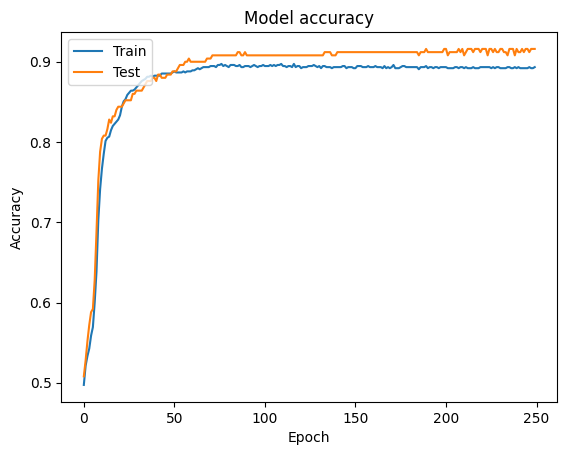

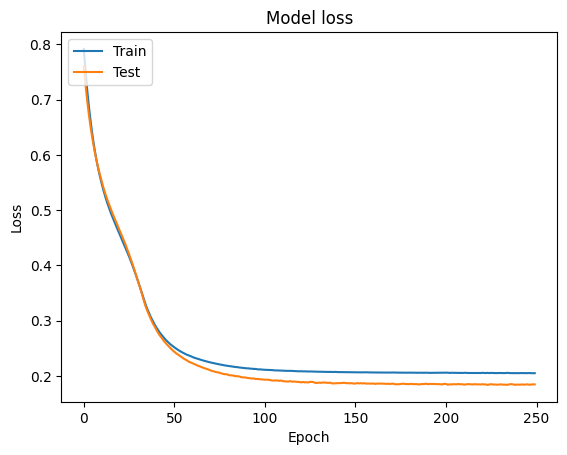

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿ Por qué loss baja y accuracy sube ?

El siguiente código plotea las fronteras de decisión.

1250/1250 [==============================] - 2s 1ms/step


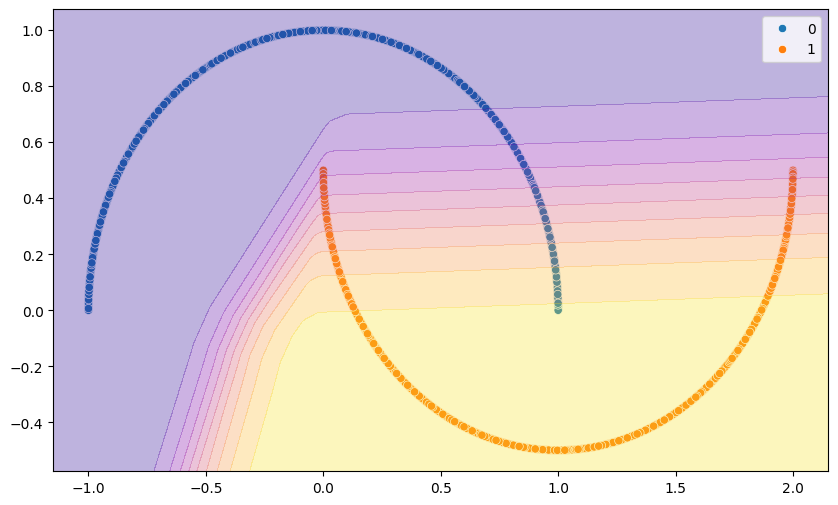

In [15]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

#### Ejercicio

Volver a entrenar una red neuronal y graficar las fronteras de decisión (lo mismo que ya hicimos) pero esta vez agregar una capa más con 10 neuronas.

Es decir, debemos tener 2 capas de 10 neuronas con Relu y luego una capa de 1 neurona con softmax.

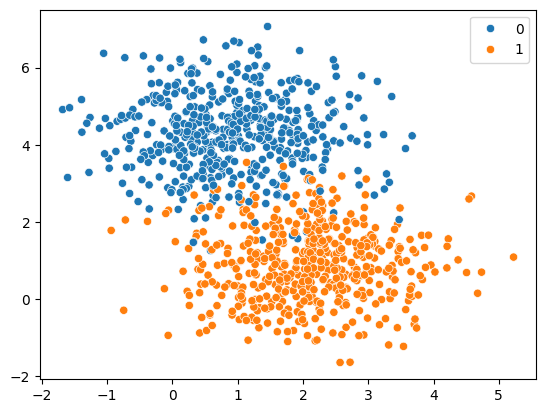

In [16]:
#COMPLETAR
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
#X, y = make_moons(n_samples=1000, random_state=0)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

In [17]:
model2 = Sequential()
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [18]:
optimizer2 = Adam(lr=0.001)

In [19]:
model2.compile(optimizer=optimizer2, loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model2

In [20]:
history2 = model2.fit(X, y, epochs=250, validation_split=0.25, batch_size=32)

Epoch 1/250
24/24 [==============================] - 1s 12ms/step - loss: 1.3150 - accuracy: 0.4293 - val_loss: 1.1634 - val_accuracy: 0.3840
Epoch 2/250
24/24 [==============================] - 0s 4ms/step - loss: 1.0396 - accuracy: 0.3600 - val_loss: 0.9378 - val_accuracy: 0.3080
Epoch 3/250
24/24 [==============================] - 0s 4ms/step - loss: 0.8665 - accuracy: 0.2000 - val_loss: 0.7879 - val_accuracy: 0.1760
Epoch 4/250
24/24 [==============================] - 0s 5ms/step - loss: 0.7449 - accuracy: 0.1947 - val_loss: 0.6742 - val_accuracy: 0.4160
Epoch 5/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.4653 - val_loss: 0.5771 - val_accuracy: 0.5040
Epoch 6/250
24/24 [==============================] - 0s 8ms/step - loss: 0.5514 - accuracy: 0.5627 - val_loss: 0.5081 - val_accuracy: 0.6800
Epoch 7/250
24/24 [==============================] - 0s 8ms/step - loss: 0.4912 - accuracy: 0.7533 - val_loss: 0.4609 - val_accuracy: 0.7840
Epoch 8/250


In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


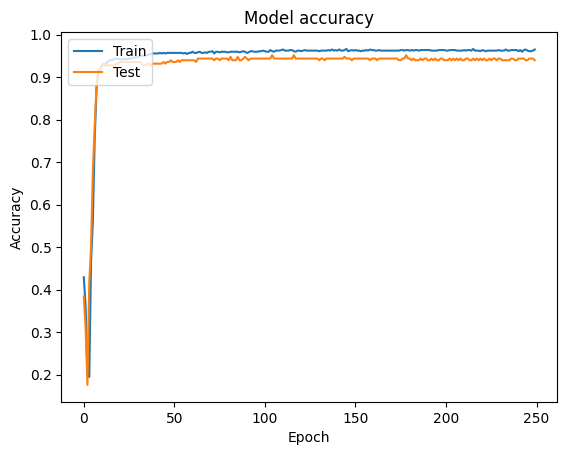

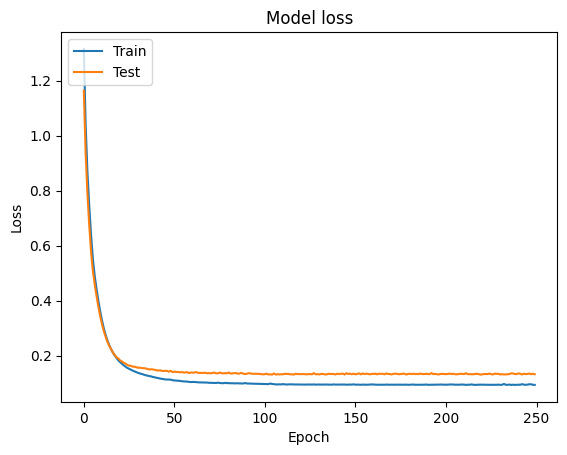

In [23]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1250/1250 [==============================] - 2s 1ms/step


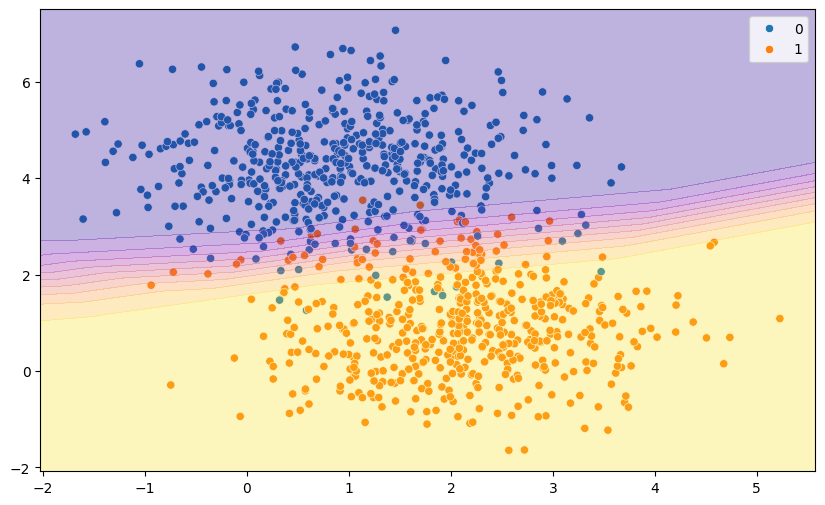

In [24]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

¿Cambió?

Podemos ver que a medida que agregamos capas y neuronas (modelo más complejo) el modelo se adapta mejor a los datos (ojo con overfitting).


# MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

En un problema de clasificación con más de 2 clases (no binario) en general utilizaremos softmax en la última capa.

Softmax nos tira un valor entre 0 y 1 para cada uno de los valores de salida. Si sumamos todas las salidas siempre va a ser = 1

In [94]:
from tensorflow.keras.datasets import mnist

In [95]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

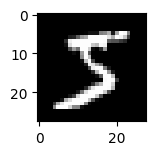

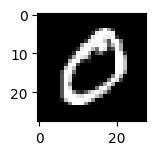

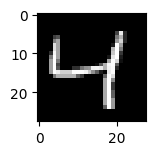

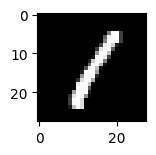

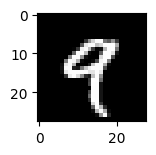

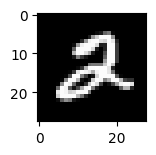

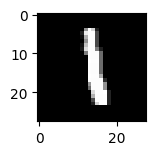

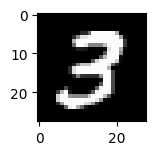

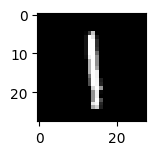

In [103]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [72]:
X_train.shape

(60000, 28, 28)

In [73]:
y_train.shape

(60000,)

Veamos en que formato está y:

In [74]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Necesitamos convertir esto a un vector de one hot para entrenar nuestra red neuronal.

EJERCICIO:

Aplicar one hot encoder a y (train y test)

In [75]:
from tensorflow.keras.utils import to_categorical
x_train=X_train.astype('float32')/255
x_test=X_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [76]:
y_train.shape

(60000, 10)

In [77]:
y_test.shape

(10000, 10)

Cada imagen tiene un tamaño de 28x28. Por lo tanto, debemos "aplanarlas" y convertirlas en una lista de 1 dimensión. Las capas densas esperan recibir una entrada de 1 dimensión.

En tensorflow, podemos utilizar una capa "flatten" para esto.

In [78]:
from tensorflow.keras.layers import Flatten

EJERCICIO:

Definir un modelo que tenga como entrada una capa del tipo Flatten. (definir input_shape).

Luego una capa densa de 128 neuronas y Relu.

Finalmente, la capa de salida. ¿De qué tipo será? ¿Cantidad de neuronas? ¿Función de activación?

In [79]:
#COMPLETAR
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Ahora compilar el modelo.

Utilizar como optimizer adam (lr de 0.0003), categorical_crossentropy como loss y accuracy como métrica.

In [80]:
#COMPLETAR
optimizer = Adam(lr=0.0003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
#COMPLETAR
history = model.fit(X_train, y_train, epochs=10, validation_split=0.10, batch_size=32)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 2.2824 - accuracy: 0.8407 - val_loss: 0.3811 - val_accuracy: 0.8933
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3935 - accuracy: 0.9065 - val_loss: 0.2770 - val_accuracy: 0.9333
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2917 - accuracy: 0.9256 - val_loss: 0.2662 - val_accuracy: 0.9335
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2506 - accuracy: 0.9351 - val_loss: 0.2342 - val_accuracy: 0.9360
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2247 - accuracy: 0.9427 - val_loss: 0.2123 - val_accuracy: 0.9467
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2090 - accuracy: 0.9461 - val_loss: 0.2422 - val_accuracy: 0.9448
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2022 - accuracy: 0.9505 - val_loss: 0.2331 - val_accur

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenar por 10 epocas. Setear un validation split de 10%. Recuerden guardar los resultados en la variable "history"

Ploteamos las métricas:

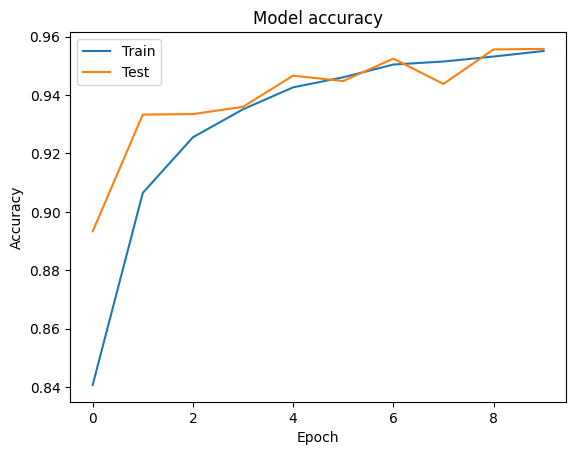

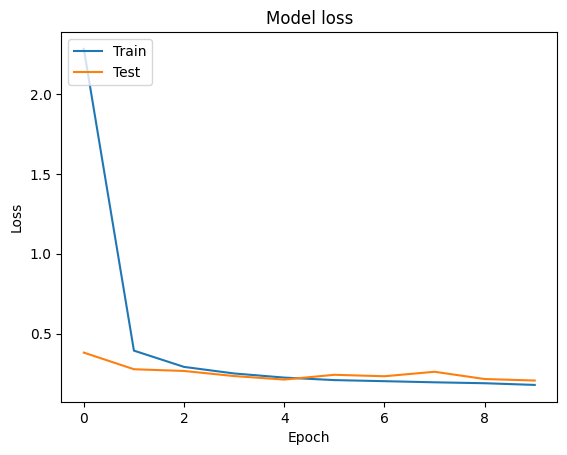

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Con nuestra red neuronal podemos hacer predicciones igual que siempre:

In [84]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [89]:
predictions[1]

array([1.3595029e-19, 4.9314275e-19, 9.9999994e-01, 1.5329374e-21,
       0.0000000e+00, 6.0104703e-22, 6.7009755e-13, 3.3680656e-18,
       1.8722345e-22, 8.6637537e-32], dtype=float32)

Vemos que no son números enteros sino que son probabilidades y entre todas suman 1.

In [90]:
predictions[1].argmax()

2

In [91]:
y_test[1].argmax()

2

Podemos evaluar:

In [88]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2438 - accuracy: 0.9506 - 914ms/epoch - 3ms/step

Test accuracy: 0.9506000280380249
